In [4]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


In [5]:

dataset_dir = r"C:\Users\Ujwal M L\OneDrive\Documents\Internship\Hackathon\dataset"

img_size = 128
batch_size = 16
epochs = 5


In [6]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True)

val_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False)


Found 1615 images belonging to 3 classes.
Found 402 images belonging to 3 classes.


In [7]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.3)(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 128, 128, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 128, 128, 3)  0           ['normalization[0][0]']      

In [5]:
history = model.fit(train_gen, validation_data=val_gen, epochs=epochs)


Epoch 1/5
2064/2064 [==============================] - 1235s 588ms/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 2.1591e-05 - val_accuracy: 1.0000
Epoch 2/5
2064/2064 [==============================] - 1212s 587ms/step - loss: 1.3572e-05 - accuracy: 1.0000 - val_loss: 4.6627e-06 - val_accuracy: 1.0000
Epoch 3/5
2064/2064 [==============================] - 1166s 565ms/step - loss: 3.6133e-06 - accuracy: 1.0000 - val_loss: 1.4218e-06 - val_accuracy: 1.0000
Epoch 4/5
2064/2064 [==============================] - 1162s 563ms/step - loss: 1.1829e-06 - accuracy: 1.0000 - val_loss: 4.0356e-07 - val_accuracy: 1.0000
Epoch 5/5
2064/2064 [==============================] - 1148s 556ms/step - loss: 4.0660e-07 - accuracy: 1.0000 - val_loss: 2.3797e-07 - val_accuracy: 1.0000


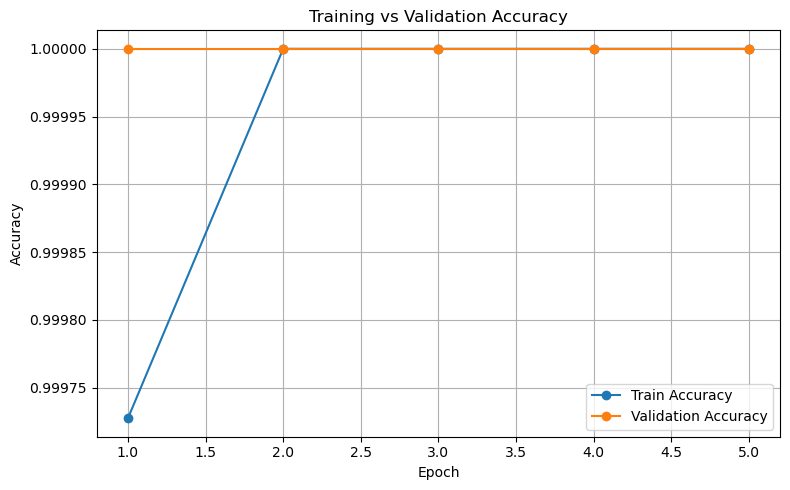

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs_range, acc, label='Train Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
print(f" Final Training Accuracy: {acc[-1] * 100:.2f}%")
print(f" Final Validation Accuracy: {val_acc[-1] * 100:.2f}%")


 Final Training Accuracy: 100.00%
 Final Validation Accuracy: 100.00%


In [40]:
for attr in dir(model):
    if not attr.startswith('_') and not callable(getattr(model, attr)):
        try:
            val = getattr(model, attr)
            if isinstance(val, tf.Tensor):
                print(f" Removing attribute: {attr}")
                delattr(model, attr)
        except Exception as e:
            print(f"Skipped {attr}: {e}")


C:\Users\Ujwal M L\AppData\Local\Temp\ipykernel_7016\3521963982.py:2: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  if not attr.startswith('_') and not callable(getattr(model, attr)):
C:\Users\Ujwal M L\AppData\Local\Temp\ipykernel_7016\3521963982.py:4: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  val = getattr(model, attr)
C:\Users\Ujwal M L\AppData\Local\Temp\ipykernel_7016\3521963982.py:2: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  if not attr.startswith('_') and not callable(getattr(model, attr)):
C:\Users\Ujwal M L\AppData\Local\Temp\ipykernel_7016\3521963982.py:4: UserWarning: `layer.updates` will be removed in a future version.

In [9]:
model.save_weights("plant_disease_weights.h5")
print("Model weights saved successfully!")


Model weights saved successfully!
